<a href="https://colab.research.google.com/github/gmazzitelli/be-a-citizen-scientist/blob/master/BeACitizenScientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GET data from local file with autentication




In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
!ls "/content/drive/My Drive/Colab Notebooks"
import pandas as pd
csv_file = "/content/drive/My Drive/Colab Notebooks/_Be a Data Scientist a #IJF19 (Responses) - Form Responses 1.csv"
df = pd.read_csv(csv_file)
df.head()

# GET data from URL
Carica il file del questionario dalla URL (shared readeable file)
buona refence [link text](https://michaelsaruggia.com/python-per-data-science-pandas/)

In [1]:
import numpy as np
import pandas as pd
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=19zCRezCS3yIy6_Igzex2sotnNja2Ks57RonGX8W2R8I&output=csv"
df = pd.read_csv(url_csv_file).replace(np.nan, 'no answer', regex=True)
df.head()

,Timestamp,Età in anni compiuti,Sesso,Cittadinanza,Sei nato in Italia?,Provincia di nascita,Provincia di dimora abituale,Titolo di Studio più alto conseguito,Cittadinanza del padre,Tuo padre è nato in Italia?,Provincia di nascita del padre,Cittadinanza della madre,Tua madre è nata in Italia?,Provincia di nascita della madre,Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?,Negli ultimi 12 mesi quante volte hai cercato informazioni?,"Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Carta (es. giornali, riviste, ecc.)]","Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Tv (es. telegiornali, talkshow)]",Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Radio (es. giornaleradio)],"Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Persone (amici, scuola, famiglia)]",Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Internet],Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Altro],"Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare?","Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?",Quali notizie ti fanno paura?,Con che frequenza ti informi su argomenti riguardanti la scienza?,Quali argomenti scientifici ti attirano di più,"Quando hai saputo della strage in discoteca a Corinaldo al concerto di Sfera Ebbasta, cosa ha catturato la tua attenzione?",Da dove hai appreso della caduta del ponte Morandi a Genova?,Hai mai usato internet?,"Sul web, dove prendi le informazioni? [testate giornalistiche online]","Sul web, dove prendi le informazioni? [social]","Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping]","Sul web, dove prendi le informazioni? [siti specifici che conosco]","Sul web, dove prendi le informazioni? [app dedicate]","Sul web, dove prendi le informazioni? [newsletter via email]",Quali social usi di più per informarti?,"Tra i social che usi di più anche per informati, quale preferisci?",Cosa cerchi di più su internet?,Qual è la prima cosa che vai a vedere sui social?,Da dove ricevi notizie senza cercarle quando sei on line?,Quali argomenti ti vengono suggeriti mentre sei online,Cosa attrae innanzitutto la tua attenzione su una notizia on line?,Condividi le notizie?,Con chi le condividi?,Come condividi le notizie che leggi?,Quando condividi lo fai ... [Perché è una notizia che mi ha impressionato],Quando condividi lo fai ... [Per farlo sapere a tutti],Quando condividi lo fai ... [Per commentare],Quando condividi lo fai ... [Perché lo fanno tutti],Secondo te ci si può fidare di ciò che scrivono i giornalisti?,Secondo te ci si può fidare delle notizie che si trovano su internet?,Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?,"Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta]",Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento],Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia],"Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)]",Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile],Cosa ti fa capire se una notizia è attendibile? [altro],Secondo te dove si diffondono di più le fake news?,Quali sono gli argormenti fake che attecchiscono di più?,Secondo te a che età si è più inclini a condividere una fake news?,Sai cos'è la reputazione digitale?,Sai quali pericoli potrebbero esserci nel postare le foto sui social?
0,4/1/2019 19:34:25,tra 35 e 44,F,italiana,no answer,Roma,Roma,scuola primaria,italiana,no answer,Belluno,italiana,no answer,Asti,Sì,Meno di una volta al mese,raramente,raramente,raramente,raramente,raramente,raramente,Radio,circa 30 minuti,bullismo,gio

# Look into data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 64 columns):
Timestamp                                                                                                                     1014 non-null object
Età in anni compiuti                                                                                                          1014 non-null object
Sesso                                                                                                                         1014 non-null object
Cittadinanza                                                                                                                  1014 non-null object
Sei nato in Italia?                                                                                                           1014 non-null object
Provincia di nascita                                                                                                          1014 non-null object
Provincia d

In [46]:
df.describe()

,Timestamp,Età in anni compiuti,Sesso,Cittadinanza,Sei nato in Italia?,Provincia di nascita,Provincia di dimora abituale,Titolo di Studio più alto conseguito,Cittadinanza del padre,Tuo padre è nato in Italia?,Provincia di nascita del padre,Cittadinanza della madre,Tua madre è nata in Italia?,Provincia di nascita della madre,Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?,Negli ultimi 12 mesi quante volte hai cercato informazioni?,"Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Carta (es. giornali, riviste, ecc.)]","Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Tv (es. telegiornali, talkshow)]",Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Radio (es. giornaleradio)],"Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Persone (amici, scuola, famiglia)]",Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Internet],Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni? [Altro],"Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare?","Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?",Quali notizie ti fanno paura?,Con che frequenza ti informi su argomenti riguardanti la scienza?,Quali argomenti scientifici ti attirano di più,"Quando hai saputo della strage in discoteca a Corinaldo al concerto di Sfera Ebbasta, cosa ha catturato la tua attenzione?",Da dove hai appreso della caduta del ponte Morandi a Genova?,Hai mai usato internet?,"Sul web, dove prendi le informazioni? [testate giornalistiche online]","Sul web, dove prendi le informazioni? [social]","Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping]","Sul web, dove prendi le informazioni? [siti specifici che conosco]","Sul web, dove prendi le informazioni? [app dedicate]","Sul web, dove prendi le informazioni? [newsletter via email]",Quali social usi di più per informarti?,"Tra i social che usi di più anche per informati, quale preferisci?",Cosa cerchi di più su internet?,Qual è la prima cosa che vai a vedere sui social?,Da dove ricevi notizie senza cercarle quando sei on line?,Quali argomenti ti vengono suggeriti mentre sei online,Cosa attrae innanzitutto la tua attenzione su una notizia on line?,Condividi le notizie?,Con chi le condividi?,Come condividi le notizie che leggi?,Quando condividi lo fai ... [Perché è una notizia che mi ha impressionato],Quando condividi lo fai ... [Per farlo sapere a tutti],Quando condividi lo fai ... [Per commentare],Quando condividi lo fai ... [Perché lo fanno tutti],Secondo te ci si può fidare di ciò che scrivono i giornalisti?,Secondo te ci si può fidare delle notizie che si trovano su internet?,Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?,"Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta]",Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento],Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia],"Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)]",Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile],Cosa ti fa capire se una notizia è attendibile? [altro],Secondo te dove si diffondono di più le fake news?,Quali sono gli argormenti fake che attecchiscono di più?,Secondo te a che età si è più inclini a condividere una fake news?,Sai cos'è la reputazione digitale?,Sai quali pericoli potrebbero esserci nel postare le foto sui social?
count,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,10

In [47]:
print(df['Cittadinanza'].value_counts())
print(df['Sei nato in Italia?'].value_counts())

italiana    977
europea      21
altra        16
Name: Cittadinanza, dtype: int64
Sì           952
no answer     39
No            23
Name: Sei nato in Italia?, dtype: int64


# dataset visualizzation

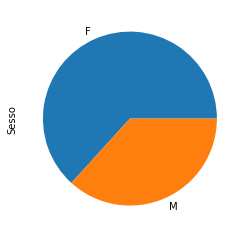

F    642
M    373
Name: Sesso, dtype: int64

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Sesso'].value_counts().plot(kind='pie')
plt.show()  
df['Sesso'].value_counts()


istogramma... 
l'ordine prescelto per una visulizzazione semplice e' in base a gli entries (che falsa la visulizzazione)

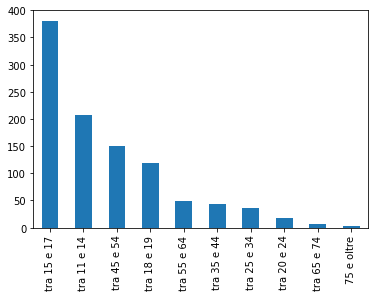

In [3]:
df['Età in anni compiuti'].value_counts().plot(kind='bar')
plt.show()  
 

data are index in ASCI oder and must be reindex 

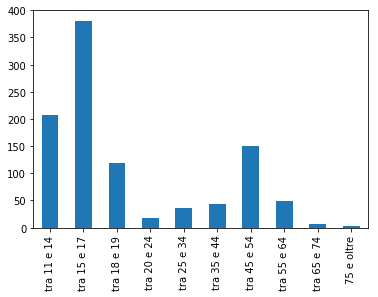

In [6]:
ordine_eta = ['tra 11 e 14', 'tra 15 e 17', 'tra 18 e 19',
       'tra 20 e 24', 'tra 25 e 34', 'tra 35 e 44', 'tra 45 e 54',
       'tra 55 e 64', 'tra 65 e 74', '75 e oltre']
df['Età in anni compiuti'].value_counts().reindex(ordine_eta).plot(kind='bar')
plt.show() 

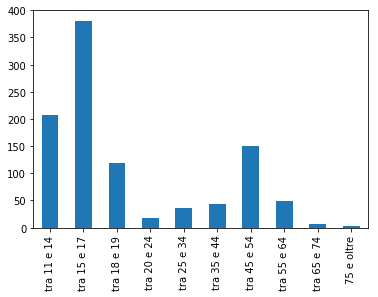

In [7]:
cat_eta = pd.Categorical(df['Età in anni compiuti'], 
                     categories=ordine_eta, 
                     ordered=True)
cat_eta.value_counts().plot(kind='bar')
plt.show()

per passarlo ad algorirmi di machine lenrning e' necessario indicizzarlo corretamente

In [0]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[ordine_eta])
eta_encoded = ordinal_encoder.fit_transform(df[['Età in anni compiuti']])

segue esempio di unsepevised machine lerning che separa in 2 cluster
dati raw

[array(['tra 11 e 14', 'tra 15 e 17', 'tra 18 e 19', 'tra 20 e 24',
       'tra 25 e 34', 'tra 35 e 44', 'tra 45 e 54', 'tra 55 e 64',
       'tra 65 e 74', '75 e oltre'], dtype=object)]


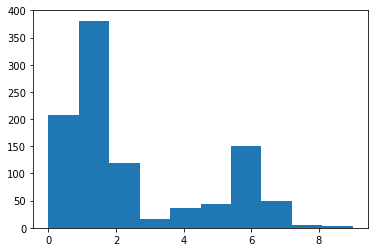

In [13]:
print(ordinal_encoder.categories_)
plt.hist(eta_encoded)
plt.show()

applichaimo una classificazione per capire le famiglie di dati separati in 2 cluster usando KMeans

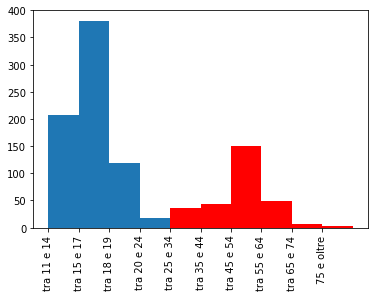

In [14]:
from sklearn import cluster
import numpy as np
X = eta_encoded
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)
#labels = dff.columns
labels = k_means.labels_
#plt.scatter(X[:,1], X[:,0], c=labels.astype(np.float))
plt.hist(X, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
plt.hist(X[labels==0], range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]),color = 'r')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ordine_eta, rotation='vertical')
plt.show()
#print(ordinal_encoder.categories_[0])


istogrammi di tutti il dataset

tra 15 e 17    381
tra 11 e 14    208
tra 45 e 54    151
tra 18 e 19    119
tra 55 e 64     49
tra 35 e 44     44
tra 25 e 34     36
tra 20 e 24     17
tra 65 e 74      6
75 e oltre       4
Name: Età in anni compiuti, dtype: int64


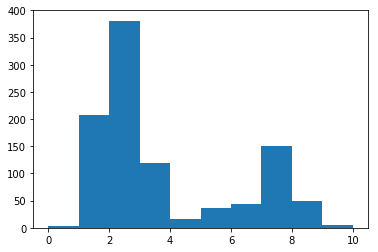

F    642
M    373
Name: Sesso, dtype: int64


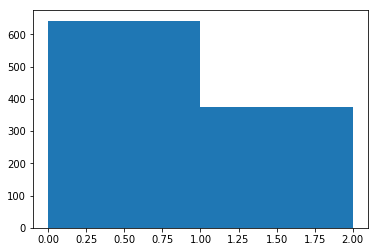

italiana    978
europea      21
altra        16
Name: Cittadinanza, dtype: int64


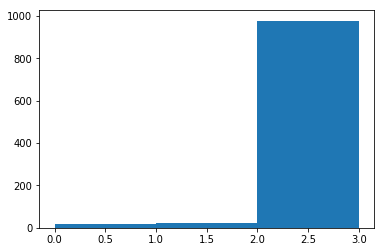

Sì           953
no answer     39
No            23
Name: Sei nato in Italia?, dtype: int64


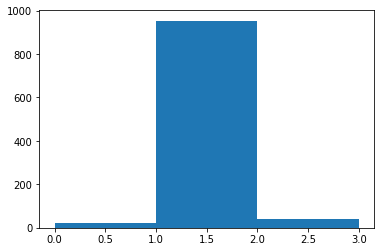

Roma               505
Varese             168
Perugia             78
no answer           60
Foggia              26
Milano              21
Napoli              13
Como                11
Genova               9
Cosenza              9
Salerno              9
Bari                 7
Reggio Calabria      6
Monza Brianza        5
Palermo              5
Brindisi             4
Ancona               4
Agrigento            3
Novara               3
Latina               3
Torino               3
Caserta              3
Catanzaro            3
L'Aquila             3
Potenza              3
Bologna              3
Trieste              2
Vicenza              2
Padova               2
Taranto              2
                  ... 
Brescia              2
Siena                2
Frosinone            2
Lecce                2
Messina              1
Ferrara              1
Cremona              1
Catania              1
Bergamo              1
Savona               1
Vercelli             1
Forlì-Cesena         1
Benevento  

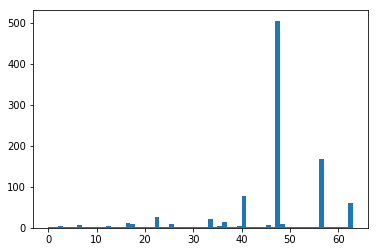

Roma                     618
Varese                   190
Perugia                   84
Como                      25
Foggia                    23
Genova                    11
Cosenza                    6
Ancona                     5
Milano                     4
Latina                     3
Barletta-Andria-Trani      3
Palermo                    3
Bari                       3
Bologna                    3
Firenze                    2
Monza e della Brianza      2
Alessandria                2
Siena                      2
Vercelli                   2
Trieste                    2
Ferrara                    2
Agrigento                  2
Cremona                    1
Vicenza                    1
Bergamo                    1
Lecce                      1
Pordenone                  1
Rovigo                     1
Fermo                      1
Udine                      1
Savona                     1
Potenza                    1
Torino                     1
Cuneo                      1
Reggio Calabri

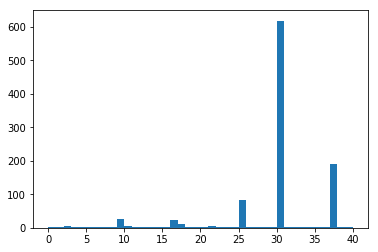

licenza di scuola secondaria di primo grado                                                                       577
scuola primaria                                                                                                   116
laurea vecchio ordinamento                                                                                        116
diploma di istituto tecnico                                                                                        53
licenza liceale                                                                                                    46
laurea magistrale biennale                                                                                         29
dottorato                                                                                                          21
laurea di primo livello                                                                                            19
diploma di istituto professionale                       

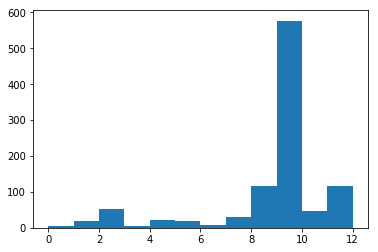

italiana    949
europea      34
altra        32
Name: Cittadinanza del padre, dtype: int64


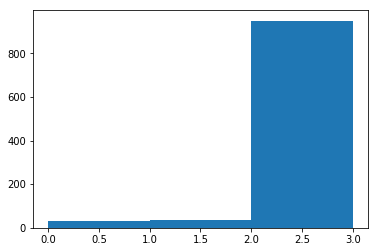

Sì           918
no answer     68
No            29
Name: Tuo padre è nato in Italia?, dtype: int64


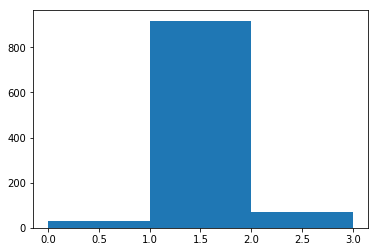

Roma                     342
Varese                   124
no answer                 95
Perugia                   65
Napoli                    33
Foggia                    27
Milano                    24
Reggio Calabria           14
Salerno                   12
Palermo                   11
Frosinone                 11
Como                      10
Cosenza                   10
Catanzaro                  9
L'Aquila                   9
Bari                       8
Messina                    8
Avellino                   8
Caserta                    8
Taranto                    8
Latina                     7
Genova                     7
Campobasso                 6
Lecce                      6
Terni                      6
Potenza                    6
Trieste                    5
Catania                    5
Benevento                  5
Siracusa                   5
                        ... 
Macerata                   2
Barletta-Andria-Trani      2
Udine                      2
Ragusa        

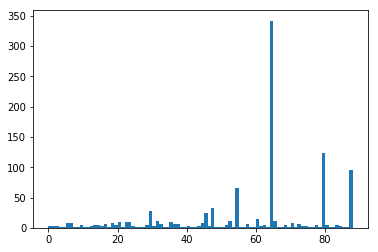

italiana    939
europea      41
altra        35
Name: Cittadinanza della madre, dtype: int64


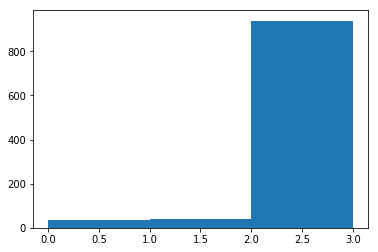

Sì           901
no answer     78
No            36
Name: Tua madre è nata in Italia?, dtype: int64


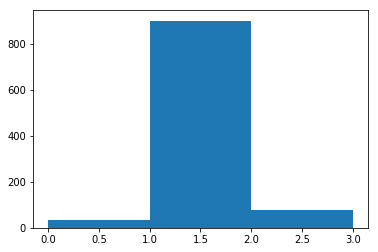

Roma                     342
Varese                   124
no answer                112
Perugia                   64
Napoli                    29
Milano                    26
Foggia                    26
Bari                      14
Cosenza                   12
Como                      11
Potenza                   10
L'Aquila                  10
Avellino                  10
Caserta                   10
Reggio Calabria            9
Venezia                    9
Salerno                    9
Frosinone                  8
Catanzaro                  8
Palermo                    8
Lecce                      7
Genova                     7
Padova                     6
Ancona                     6
Agrigento                  5
Cagliari                   5
Brindisi                   5
Forlì-Cesena               4
Latina                     4
Terni                      4
                        ... 
Sassari                    2
Asti                       2
Caltanissetta              2
Rieti         

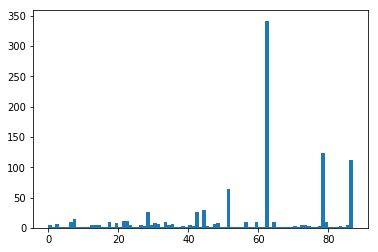

Sì    985
No     30
Name: Negli ultimi 12 mesi ti è mai capitato di cercare informazioni?, dtype: int64


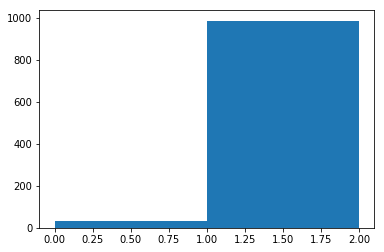

Tutti i giorni                   544
Più di due volte a settimana     324
Meno di due volte a settimana     94
no answer                         30
Meno di una volta al mese         23
Name: Negli ultimi 12 mesi quante volte hai cercato informazioni?, dtype: int64


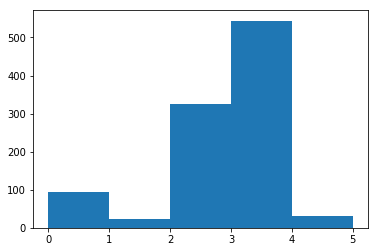

raramente                         515
mai                               257
spesso                            187
no answer                          30
sempre                             19
mai, raramente                      2
mai, raramente, spesso, sempre      2
mai, raramente, spesso              1
mai, spesso                         1
raramente, spesso                   1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Carta (es. giornali, riviste, ecc.)], dtype: int64


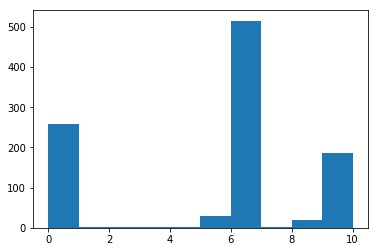

spesso                            461
raramente                         323
mai                               108
sempre                             85
no answer                          30
raramente, spesso                   3
mai, raramente, spesso, sempre      2
mai, raramente, spesso              1
mai, spesso                         1
spesso, sempre                      1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Tv (es. telegiornali, talkshow)], dtype: int64


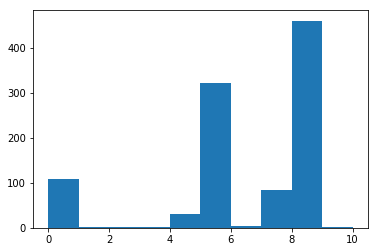

raramente                         391
mai                               338
spesso                            210
sempre                             36
no answer                          30
mai, raramente                      5
mai, raramente, spesso, sempre      2
mai, raramente, spesso              1
raramente, spesso                   1
spesso, sempre                      1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Radio (es. giornaleradio)], dtype: int64


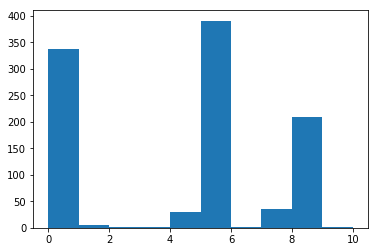

spesso                            562
raramente                         259
sempre                            118
mai                                30
no answer                          30
raramente, spesso                   7
spesso, sempre                      3
mai, spesso                         2
mai, raramente, spesso, sempre      2
mai, raramente, spesso              1
mai, raramente                      1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Persone (amici, scuola, famiglia)], dtype: int64


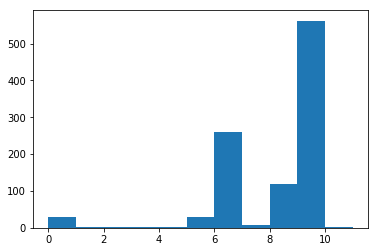

sempre                            621
spesso                            328
no answer                          30
raramente                          19
mai                                 7
spesso, sempre                      4
mai, raramente, spesso, sempre      2
mai, raramente, spesso              1
mai, spesso                         1
mai, sempre                         1
mai, spesso, sempre                 1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Internet], dtype: int64


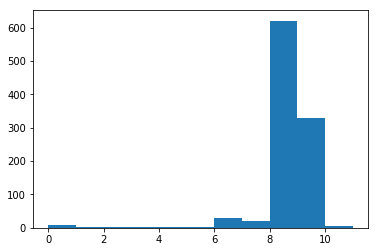

mai                               423
raramente                         372
spesso                            132
sempre                             41
no answer                          30
mai, raramente                      7
raramente, spesso                   6
mai, raramente, spesso, sempre      2
mai, raramente, spesso              1
mai, spesso                         1
Name: Negli ultimi 12 mesi che strumenti hai utilizzato per cercare informazioni?  [Altro], dtype: int64


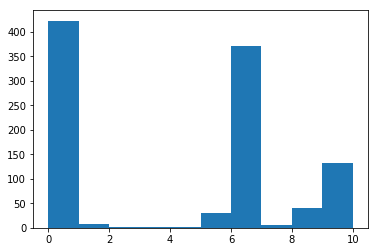

Internet     826
Persone       52
Carta         52
Tv            35
no answer     30
Altro         11
Radio          9
Name: Tra gli strumenti che negli ultimi 12 mesi hai utilizzato per cercare informazioni, qual è quello che preferisci usare? , dtype: int64


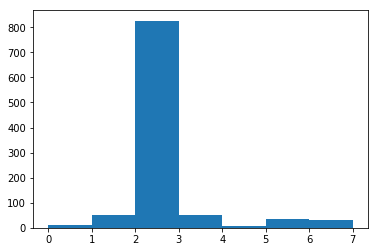

circa 30 minuti      431
meno di 10 minuti    315
circa 1 ora          157
più di un'ora         82
no answer             30
Name: Negli ultimi 12 mesi, quando hai cercato notizie, quanto tempo hai impiegato mediamente al giorno nella ricerca?, dtype: int64


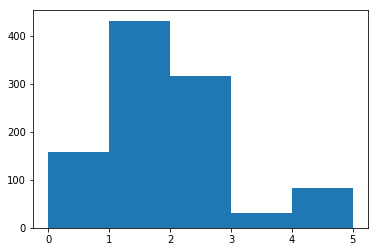

terrorismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori             153
altro                                                                                  83
catastrofi naturali                                                                    75
bullismo, violenze e/o abusi sulle donne, violenze e/o abusi sui minori                70
terrorismo, violenze e/o abusi sui minori, catastrofi naturali                         67
terrorismo                                                                             64
terrorismo, catastrofi naturali                                                        61
terrorismo, violenze e/o abusi sulle donne, catastrofi naturali                        60
violenze e/o abusi sulle donne, violenze e/o abusi sui minori, catastrofi naturali     50
violenze e/o abusi sulle donne, violenze e/o abusi sui minori                          41
violenze e/o abusi sui minori                                                          31
no answer 

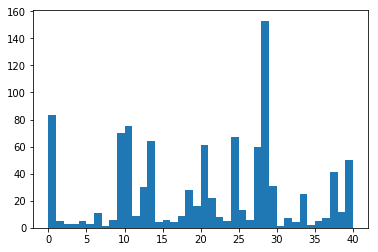

settimanalmente     379
mensilmente         272
giornalmente        172
praticamente mai    162
no answer            30
Name: Con che frequenza ti informi su argomenti riguardanti la scienza?, dtype: int64


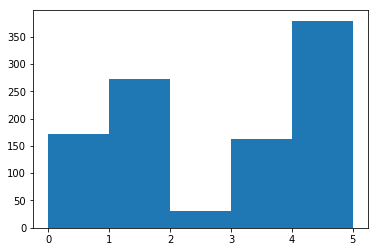

no answer                                                          192
astronomia, curiosità scientifiche, tecnologia, innovazione         42
medicina, ecologia/clima, tecnologia, innovazione                   39
medicina, curiosità scientifiche, tecnologia, innovazione           38
ecologia/clima, curiosità scientifiche, tecnologia, innovazione     35
tecnologia, innovazione                                             21
medicina, ecologia/clima, curiosità scientifiche                    21
ecologia/clima, astronomia, tecnologia, innovazione                 19
ecologia/clima, astronomia, curiosità scientifiche                  19
astronomia                                                          16
medicina, curiosità scientifiche, biologia                          16
curiosità scientifiche                                              16
medicina                                                            15
ecologia/clima, curiosità scientifiche, biologia                    15
medici

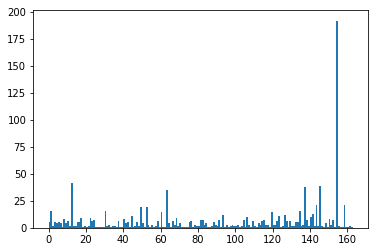

commenti e discussioni riguardo la notizia                                                                                                                                                                                                                       178
i video                                                                                                                                                                                                                                                          108
non so                                                                                                                                                                                                                                                            59
i titoli delle testate giornalistiche                                                                                                                                                                                    

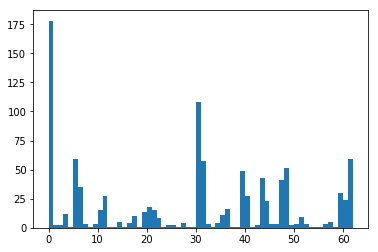

dalla tv                                                                                                                                                            542
da internet                                                                                                                                                          95
da internet, dalla tv                                                                                                                                                90
dalla tv, da una persona che ne parlava                                                                                                                              42
dalla radio                                                                                                                                                          41
da una persona che ne parlava                                                                                                                                   

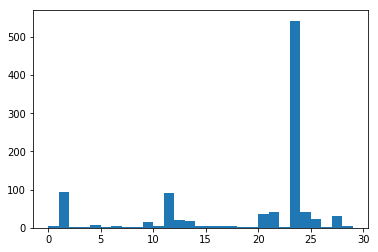

Sì           974
no answer     30
No            11
Name: Hai mai usato internet?, dtype: int64


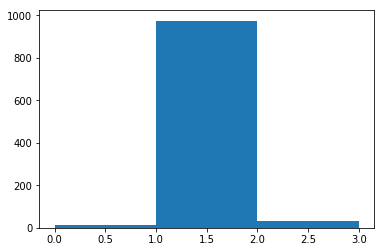

spesso                            428
raramente                         300
sempre                            140
mai                               109
no answer                          31
mai, raramente                      2
mai, raramente, spesso, sempre      2
mai, spesso                         1
raramente, spesso, sempre           1
spesso, sempre                      1
Name: Sul web, dove prendi le informazioni? [testate giornalistiche online], dtype: int64


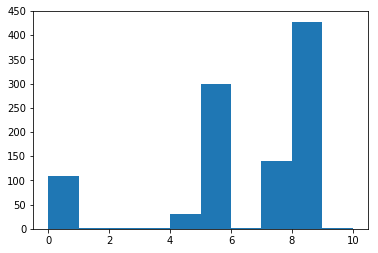

spesso                            392
raramente                         267
sempre                            175
mai                               141
no answer                          31
spesso, sempre                      3
mai, raramente                      2
mai, raramente, spesso, sempre      2
raramente, spesso, sempre           1
raramente, spesso                   1
Name: Sul web, dove prendi le informazioni? [social], dtype: int64


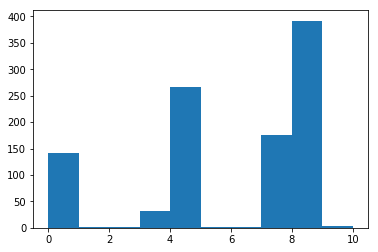

spesso                            455
sempre                            452
raramente                          49
no answer                          31
mai                                18
spesso, sempre                      5
mai, raramente, spesso, sempre      2
raramente, sempre                   1
raramente, spesso, sempre           1
raramente, spesso                   1
Name: Sul web, dove prendi le informazioni? [motori di ricerca (es google, safari, ping], dtype: int64


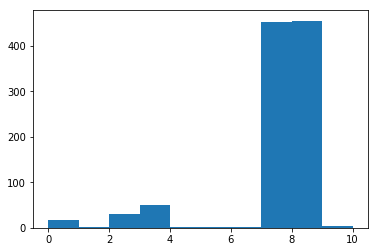

spesso                            385
raramente                         312
sempre                            147
mai                               132
no answer                          31
mai, raramente, spesso, sempre      2
spesso, sempre                      2
mai, spesso                         1
raramente, spesso, sempre           1
raramente, spesso                   1
mai, raramente                      1
Name: Sul web, dove prendi le informazioni? [siti specifici che conosco], dtype: int64


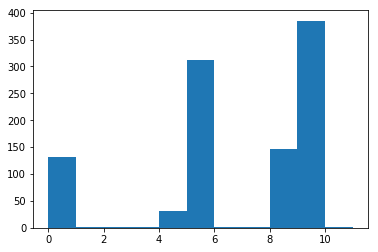

mai                               438
raramente                         321
spesso                            165
sempre                             46
no answer                          31
mai, raramente                      8
mai, raramente, spesso, sempre      2
mai, spesso                         1
mai, sempre                         1
raramente, spesso, sempre           1
raramente, spesso                   1
Name: Sul web, dove prendi le informazioni? [app dedicate], dtype: int64


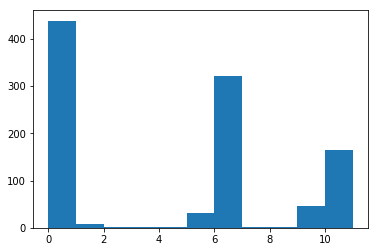

mai                               596
raramente                         245
spesso                            103
no answer                          39
sempre                             23
mai, raramente                      5
raramente, spesso                   2
mai, raramente, spesso, sempre      2
Name: Sul web, dove prendi le informazioni? [newsletter via email], dtype: int64


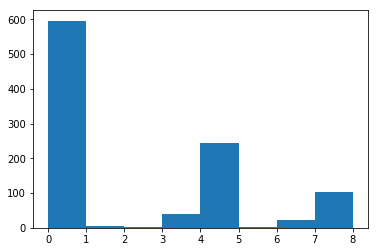

Instagram, Youtube                                                206
Altro                                                             109
Instagram                                                         103
Youtube                                                            72
Instagram, Youtube, Altro                                          61
Facebook                                                           55
Instagram, Facebook, Youtube                                       54
Facebook, Youtube                                                  44
Instagram, Facebook                                                43
Instagram, Altro                                                   33
Youtube, Altro                                                     32
no answer                                                          31
Twitter                                                            11
Instagram, Facebook, Twitter                                       11
Facebook, Youtube, A

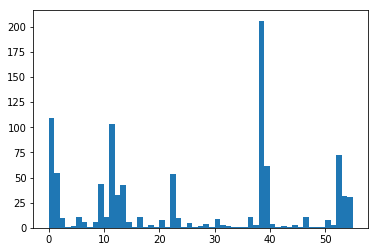

Instagram    400
Youtube      227
Altro        152
Facebook     151
Twitter       41
no answer     31
Reddit        10
Snapchat       3
Name: Tra i social che usi di più anche per informati, quale preferisci?, dtype: int64


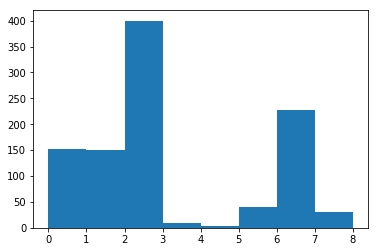

no answer                                                                                                                                                                                                                      31
sport, film - serie tv, musica                                                                                                                                                                                                  9
altro                                                                                                                                                                                                                           8
gossip, Notizie/cronaca/attualità, film - serie tv, musica, cultura (arte, cinema, teatro, storia, letteratura, libri)                                                                                                          7
gossip, shopping online, moda, film - serie tv, musica                                          

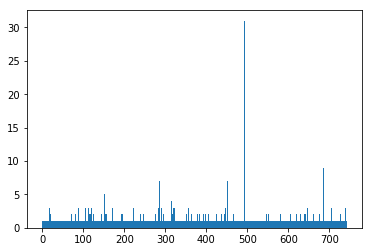

foto              268
news              226
memes             207
video             128
profili vari      118
no answer          32
like/followers     28
classifiche         8
Name: Qual è la prima cosa che vai a vedere sui social?, dtype: int64


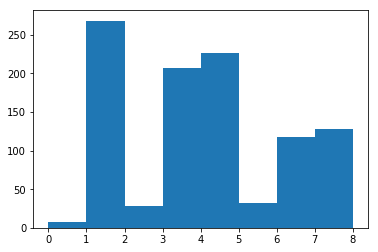

Non ne ricevo                                                                                                                                                               115
Da un motore di ricerca online (es google, bing, safari ...)                                                                                                                114
Da un'app di news (es google news, apple news...)                                                                                                                            88
Dalle Home dei social                                                                                                                                                        60
Dai video proposti su Youtube                                                                                                                                                39
no answer                                                                                                               

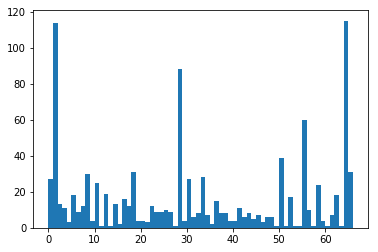

no answer                                                                                                                                                                                            31
shopping online                                                                                                                                                                                      29
altro                                                                                                                                                                                                28
Notizie/cronaca/attualità                                                                                                                                                                            22
Notizie/cronaca/attualità, shopping online                                                                                                                                                           12


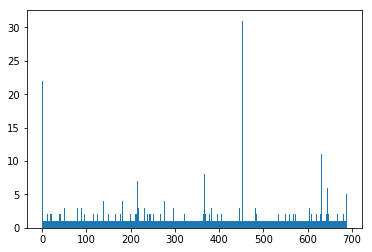

l'argomento che tratta                                                                                                                324
il titolo, l'argomento che tratta                                                                                                     147
il titolo                                                                                                                             108
il titolo, la grafica, l'argomento che tratta                                                                                          47
l'argomento che tratta, commenti e discussioni riguardo la notizia                                                                     40
la grafica, l'argomento che tratta                                                                                                     33
no answer                                                                                                                              31
la grafica                        

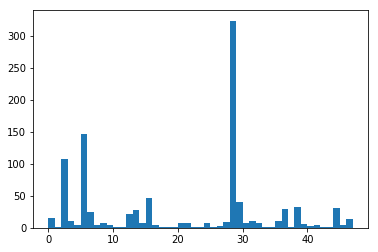

raramente    466
spesso       314
mai          169
sempre        35
no answer     31
Name: Condividi le notizie?, dtype: int64


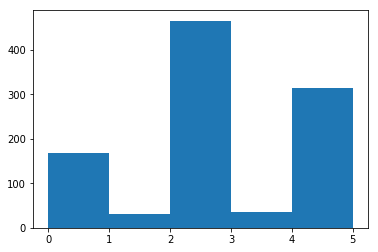

famiglia, amici più stretti                                                                                 207
no answer                                                                                                   199
amici più stretti                                                                                           126
famiglia, amici più stretti, gruppi con lo stesso interesse                                                  78
tutti, attraverso post pubblici                                                                              57
famiglia                                                                                                     52
amici più stretti, gruppi con lo stesso interesse                                                            51
gruppi con lo stesso interesse                                                                               34
famiglia, amici più stretti, conoscenti                                                                 

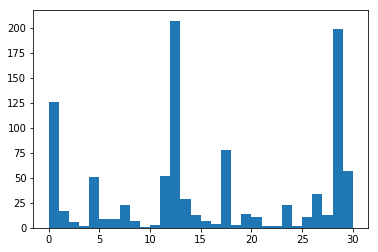

con un'app di messaggistica istantanea (whatsapp, SMS), ne parlo a voce                                              277
no answer                                                                                                            209
ne parlo a voce                                                                                                      153
con un'app di messaggistica istantanea (whatsapp, SMS)                                                               143
con un'app di messaggistica istantanea (whatsapp, SMS), ne parlo a voce, postando e commentando sui social            54
postando e commentando sui social                                                                                     52
ne parlo a voce, postando e commentando sui social                                                                    44
con un'app di messaggistica istantanea (whatsapp, SMS), postando e commentando sui social                             36
altro                           

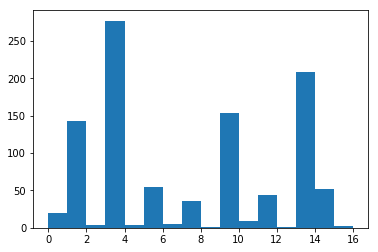

molto             370
abbastanza        368
no answer         209
poco               55
mai per questo     13
Name: Quando condividi lo fai ...  [Perché è una notizia che mi ha impressionato], dtype: int64


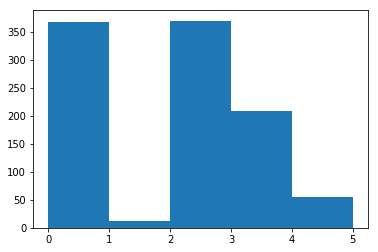

abbastanza        299
poco              264
no answer         209
mai per questo    130
molto             113
Name: Quando condividi lo fai ...  [Per farlo sapere a tutti], dtype: int64


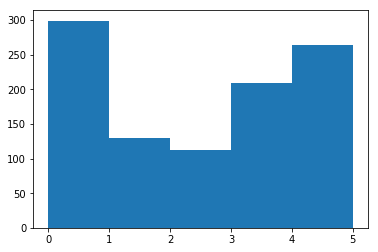

poco              282
abbastanza        278
no answer         209
mai per questo    178
molto              68
Name: Quando condividi lo fai ...  [Per commentare], dtype: int64


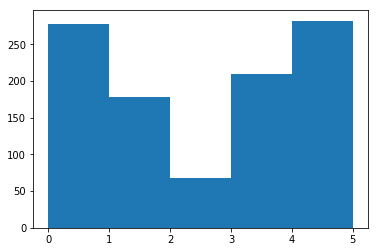

mai per questo    694
no answer         209
poco               91
abbastanza         15
molto               6
Name: Quando condividi lo fai ...  [Perché lo fanno tutti], dtype: int64


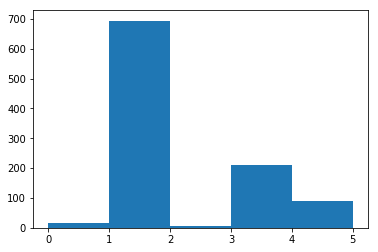

dipende dal giornale o dalla fonte    768
generalmente no                        95
generalmente si                        93
no answer                              30
non saprei/non mi interessa            29
Name: Secondo te ci si può fidare di ciò che scrivono i giornalisti?, dtype: int64


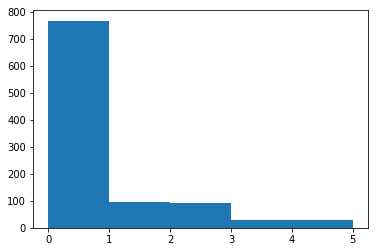

dipende dalla notizia          695
generalmente no                168
generalmente si                103
no answer                       30
non saprei/non mi interessa     19
Name: Secondo te ci si può fidare delle notizie che si trovano su internet?, dtype: int64


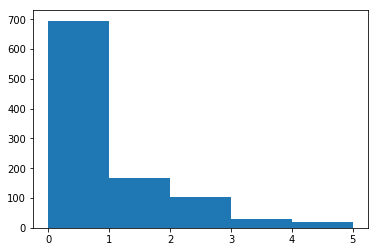

si           343
dipende      342
no           194
non lo so    106
no answer     30
Name: Ritieni che esistano sistemi sicuri per capire con certezza se una notizia è vera o no?, dtype: int64


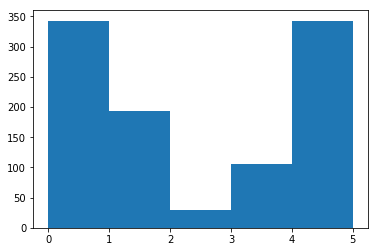

abbastanza    471
poco          297
molto         116
per niente    101
no answer      30
Name: Cosa ti fa capire se una notizia è attendibile? [La notizia in sé, l'argomento che tratta], dtype: int64


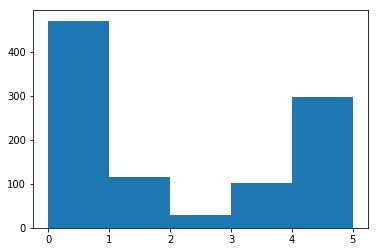

abbastanza    460
molto         407
poco           93
no answer      30
per niente     25
Name: Cosa ti fa capire se una notizia è attendibile? [Se riporta le fonti da cui è tratto l'argomento], dtype: int64


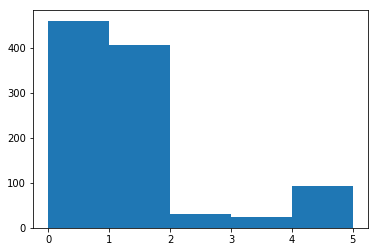

abbastanza    384
poco          356
per niente    125
molto         120
no answer      30
Name: Cosa ti fa capire se una notizia è attendibile? [Il modo in cui è raccontata la notizia], dtype: int64


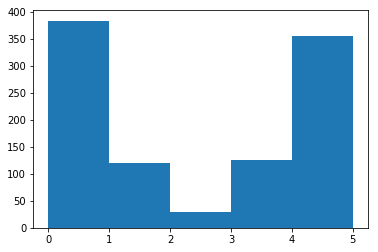

molto         446
abbastanza    415
poco           97
no answer      30
per niente     27
Name: Cosa ti fa capire se una notizia è attendibile? [La fonte che la pubblica (il sito, il giornale, il social)], dtype: int64


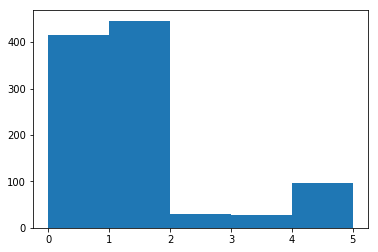

poco          417
abbastanza    289
per niente    221
molto          58
no answer      30
Name: Cosa ti fa capire se una notizia è attendibile? [La forma e lo stile], dtype: int64


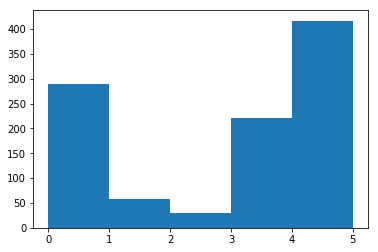

per niente    374
poco          325
abbastanza    200
molto          86
no answer      30
Name: Cosa ti fa capire se una notizia è attendibile? [altro], dtype: int64


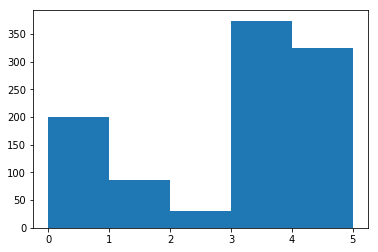

Facebook                                                                                                                                                               63
Facebook, messaggistica istantanea (whatsapp, messenger, instagram chat...)                                                                                            44
Facebook, blog e siti vari                                                                                                                                             40
Facebook, blog e siti vari, messaggistica istantanea (whatsapp, messenger, instagram chat...)                                                                          40
blog e siti vari                                                                                                                                                       33
no answer                                                                                                                                             

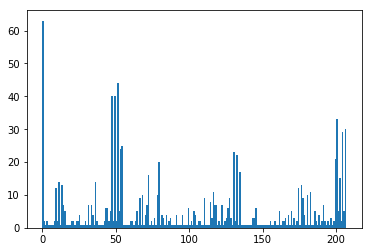

Notizie/cronaca/attualità                                                                                                                                             53
gossip                                                                                                                                                                34
no answer                                                                                                                                                             30
Notizie/cronaca/attualità, gossip                                                                                                                                     29
Notizie/cronaca/attualità, politica, gossip                                                                                                                           27
altro                                                                                                                                                      

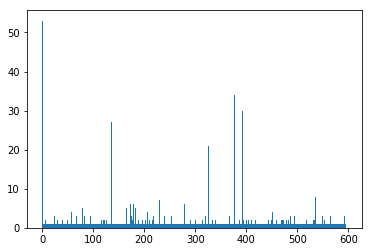

tra 15 e 20        284
tra 10 e 14        227
sopra i 50         158
tra 21 e 30        110
tra 41 e 50         94
tra 31 e 40         65
meno di 10 anni     47
no answer           30
Name: Secondo te a che età si è più inclini a condividere una fake news?, dtype: int64


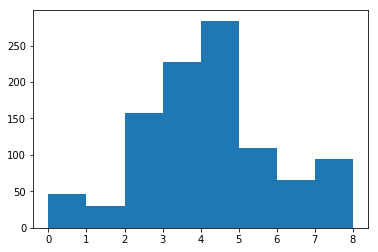

si                  493
no                  427
non mi interessa     65
no answer            30
Name: Sai cos'è la reputazione digitale?, dtype: int64


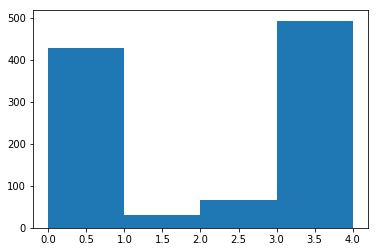

si                              872
lo so, ma non mi interessa       71
no                               34
no answer                        30
non lo so e non mi interessa      8
Name: Sai quali pericoli potrebbero esserci nel postare le foto sui social?, dtype: int64


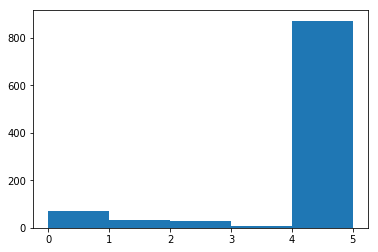

In [23]:
for i in range (1, len(df.columns)):
  ordinal_encoder = OrdinalEncoder()
  ordinated_encoded = ordinal_encoder.fit_transform(df[[df.columns[i]]])
  print (df[df.columns[i]].value_counts())
  plt.hist(ordinated_encoded, range=(0,len(ordinal_encoder.categories_[0])), bins=len(ordinal_encoder.categories_[0]))
  
  plt.show()